### Underway Intake Temperature from Dyson PCO2 system

Data provided by J.Cross from PCO2 system

In [89]:
%matplotlib inline

In [29]:
import pandas as pd
import numpy as np

In [75]:
filename = 'data/GO9_2017-2018.all.txt'
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%y %H:%M:%S')

df = pd.read_csv(filename, 
                  parse_dates={'datetime': ['PC Date', 'PC Time']}, 
                  date_parser=dateparse,
                  index_col='datetime')


In [111]:
df.head()

,Intake Temp,latitude,longitude
datetime,,,
2017-04-27 00:02:47,0.84,56.9987,-164.0795
2017-04-27 00:05:00,0.81,56.9986,-164.0793
2017-04-27 00:07:12,1.21,56.9985,-164.0792
2017-04-27 00:09:22,0.95,56.9985,-164.0796
2017-04-27 00:16:57,0.81,56.9988,-164.0818


In [112]:
df.tail()

,Intake Temp,latitude,longitude
datetime,,,
2018-05-10 15:16:15,5.01,NaN,NaN
2018-05-10 15:20:04,4.81,NaN,NaN
2018-05-10 15:23:54,5.09,NaN,NaN
2018-05-10 15:27:41,5.09,NaN,NaN
2018-05-10 15:29:08,NaN,NaN,NaN


In [97]:
dfi = df['2018-04':'2018-05']

In [98]:
import gmt

In [99]:
fig = gmt.Figure()

#projection - 
fig.coast(region=[-185, -150, 50, 65], projection='B-167.5/60/55/60/6i', land='black', water='lightgrey',
          frame=True,U=True) 

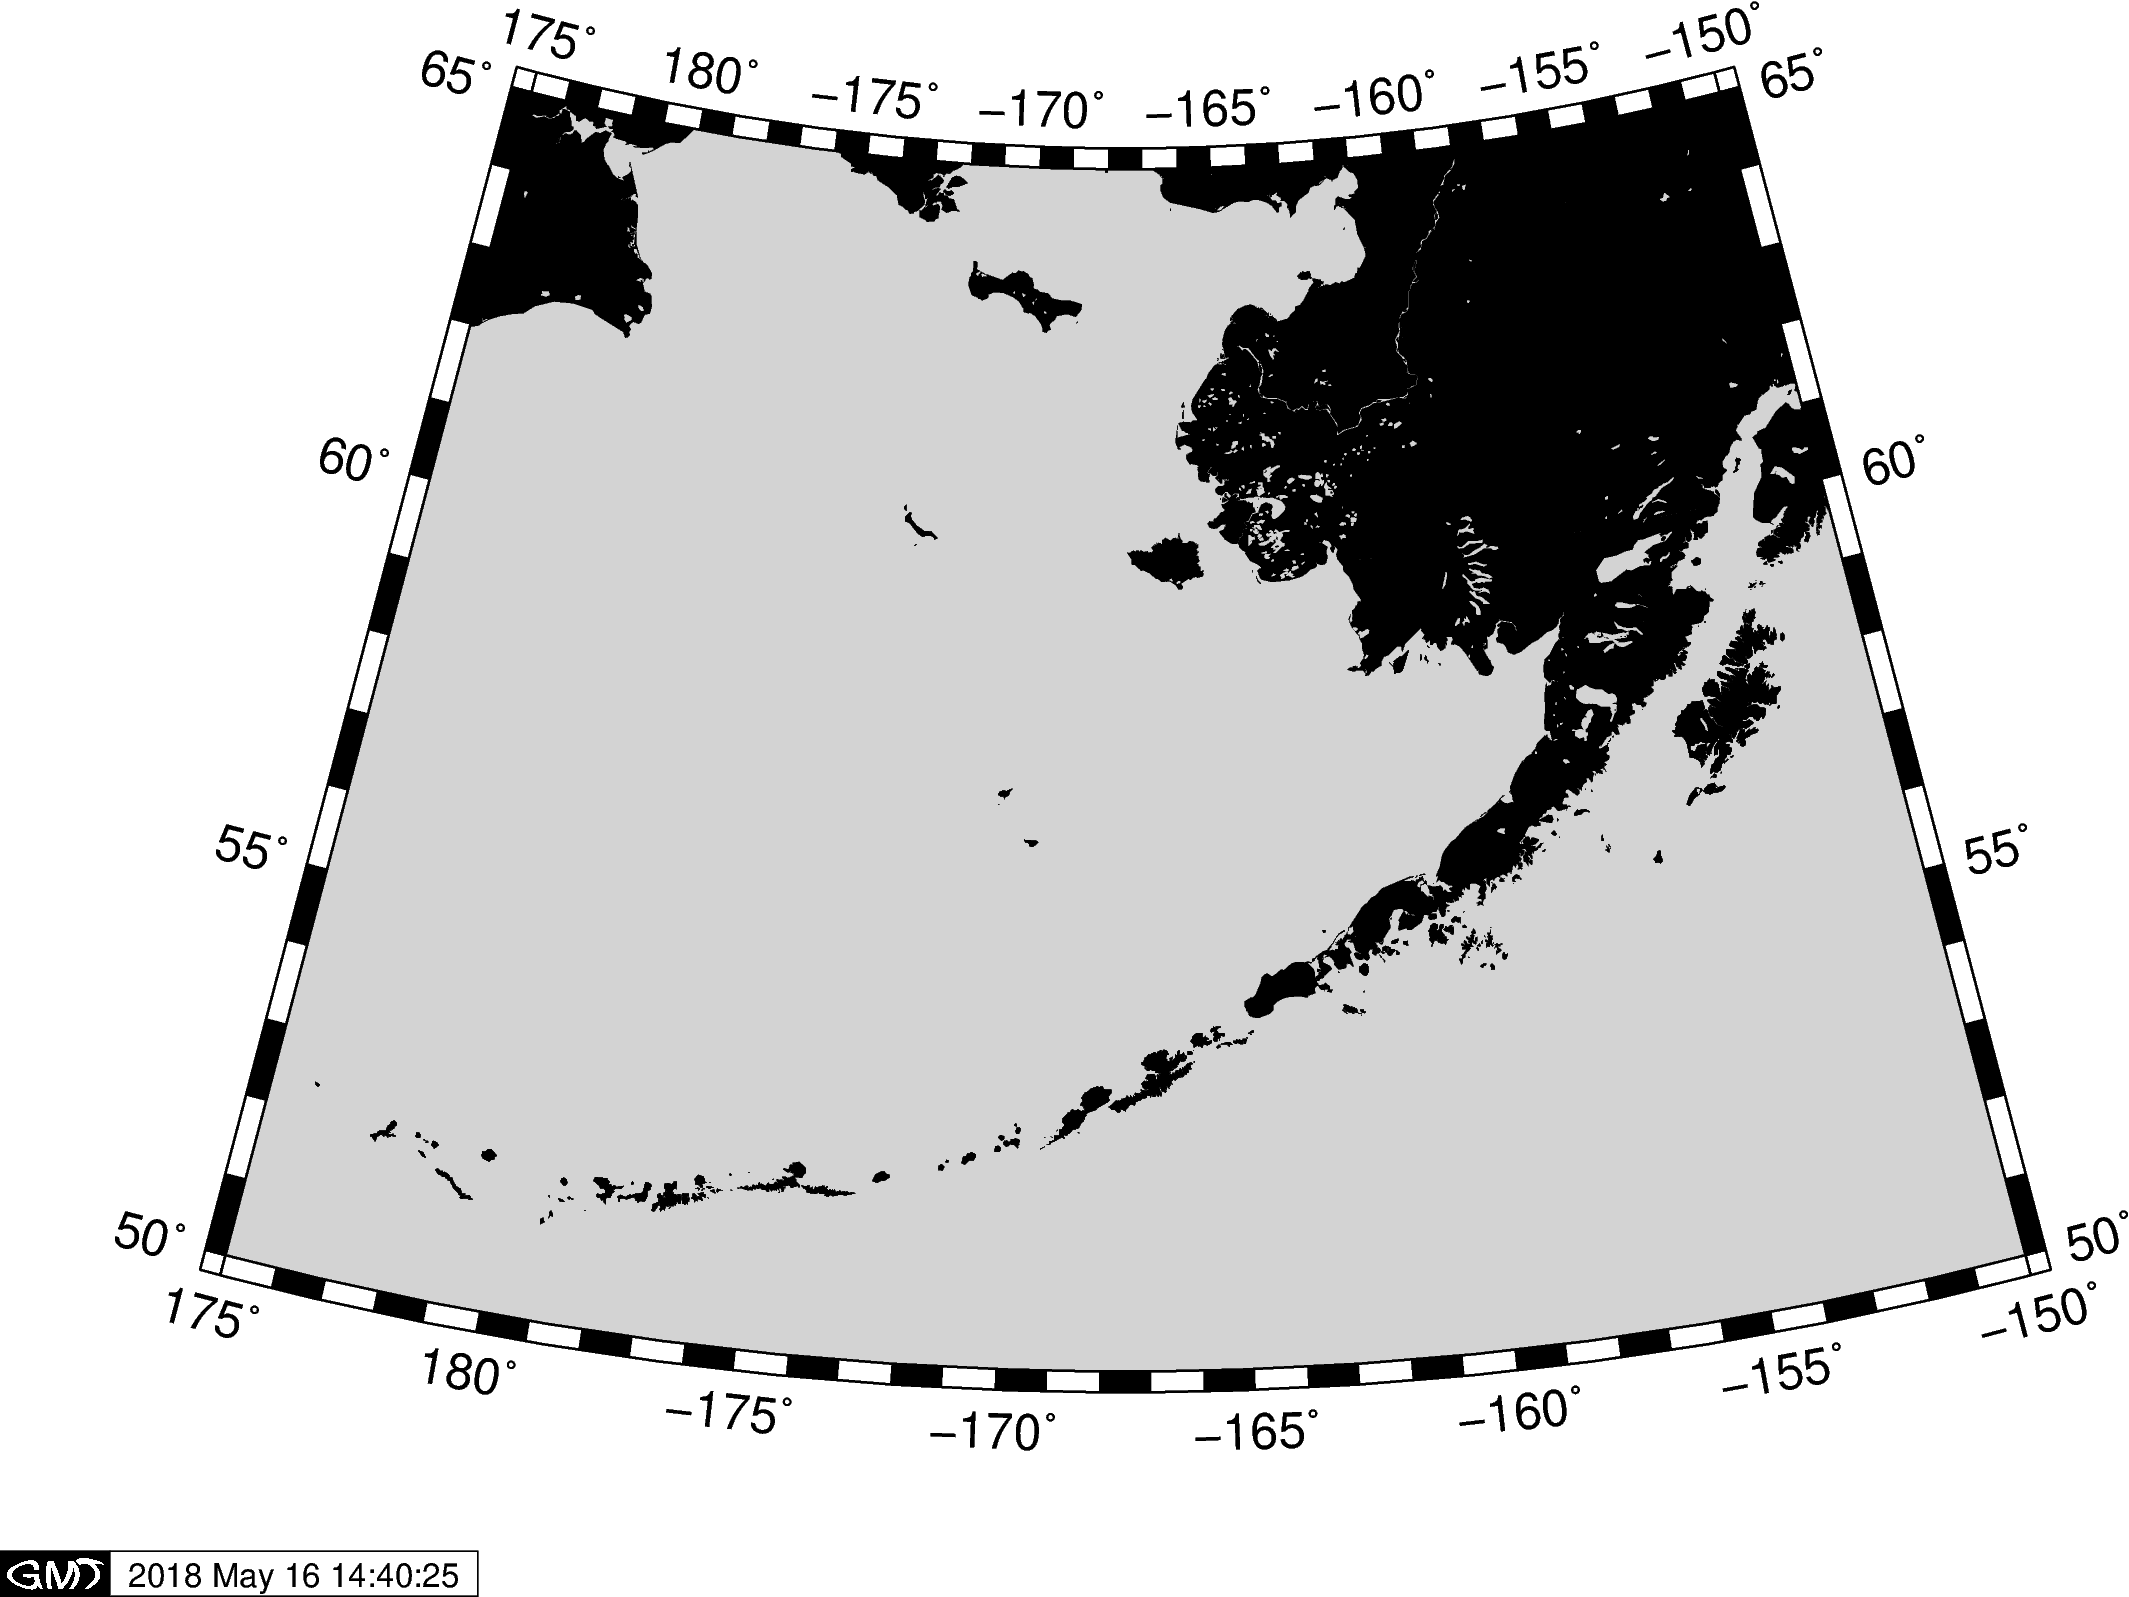

In [100]:
fig.show()

In [108]:
#choose temp boundaries
dfmiss = dfi.copy()
dfmiss['Intake Temp'].loc[(dfi['Intake Temp'] > 7) | (dfi['Intake Temp'] <-2)] = np.nan
# normalize data for colormap
dfnorm = dfmiss.apply(lambda x: (x - (-2)) / (6 - (-2)))
fig.plot(x=dfi.longitude.values, y=dfi.latitude.values, color=256*dfnorm['Intake Temp'], cmap='thermal', style='c0.05c')


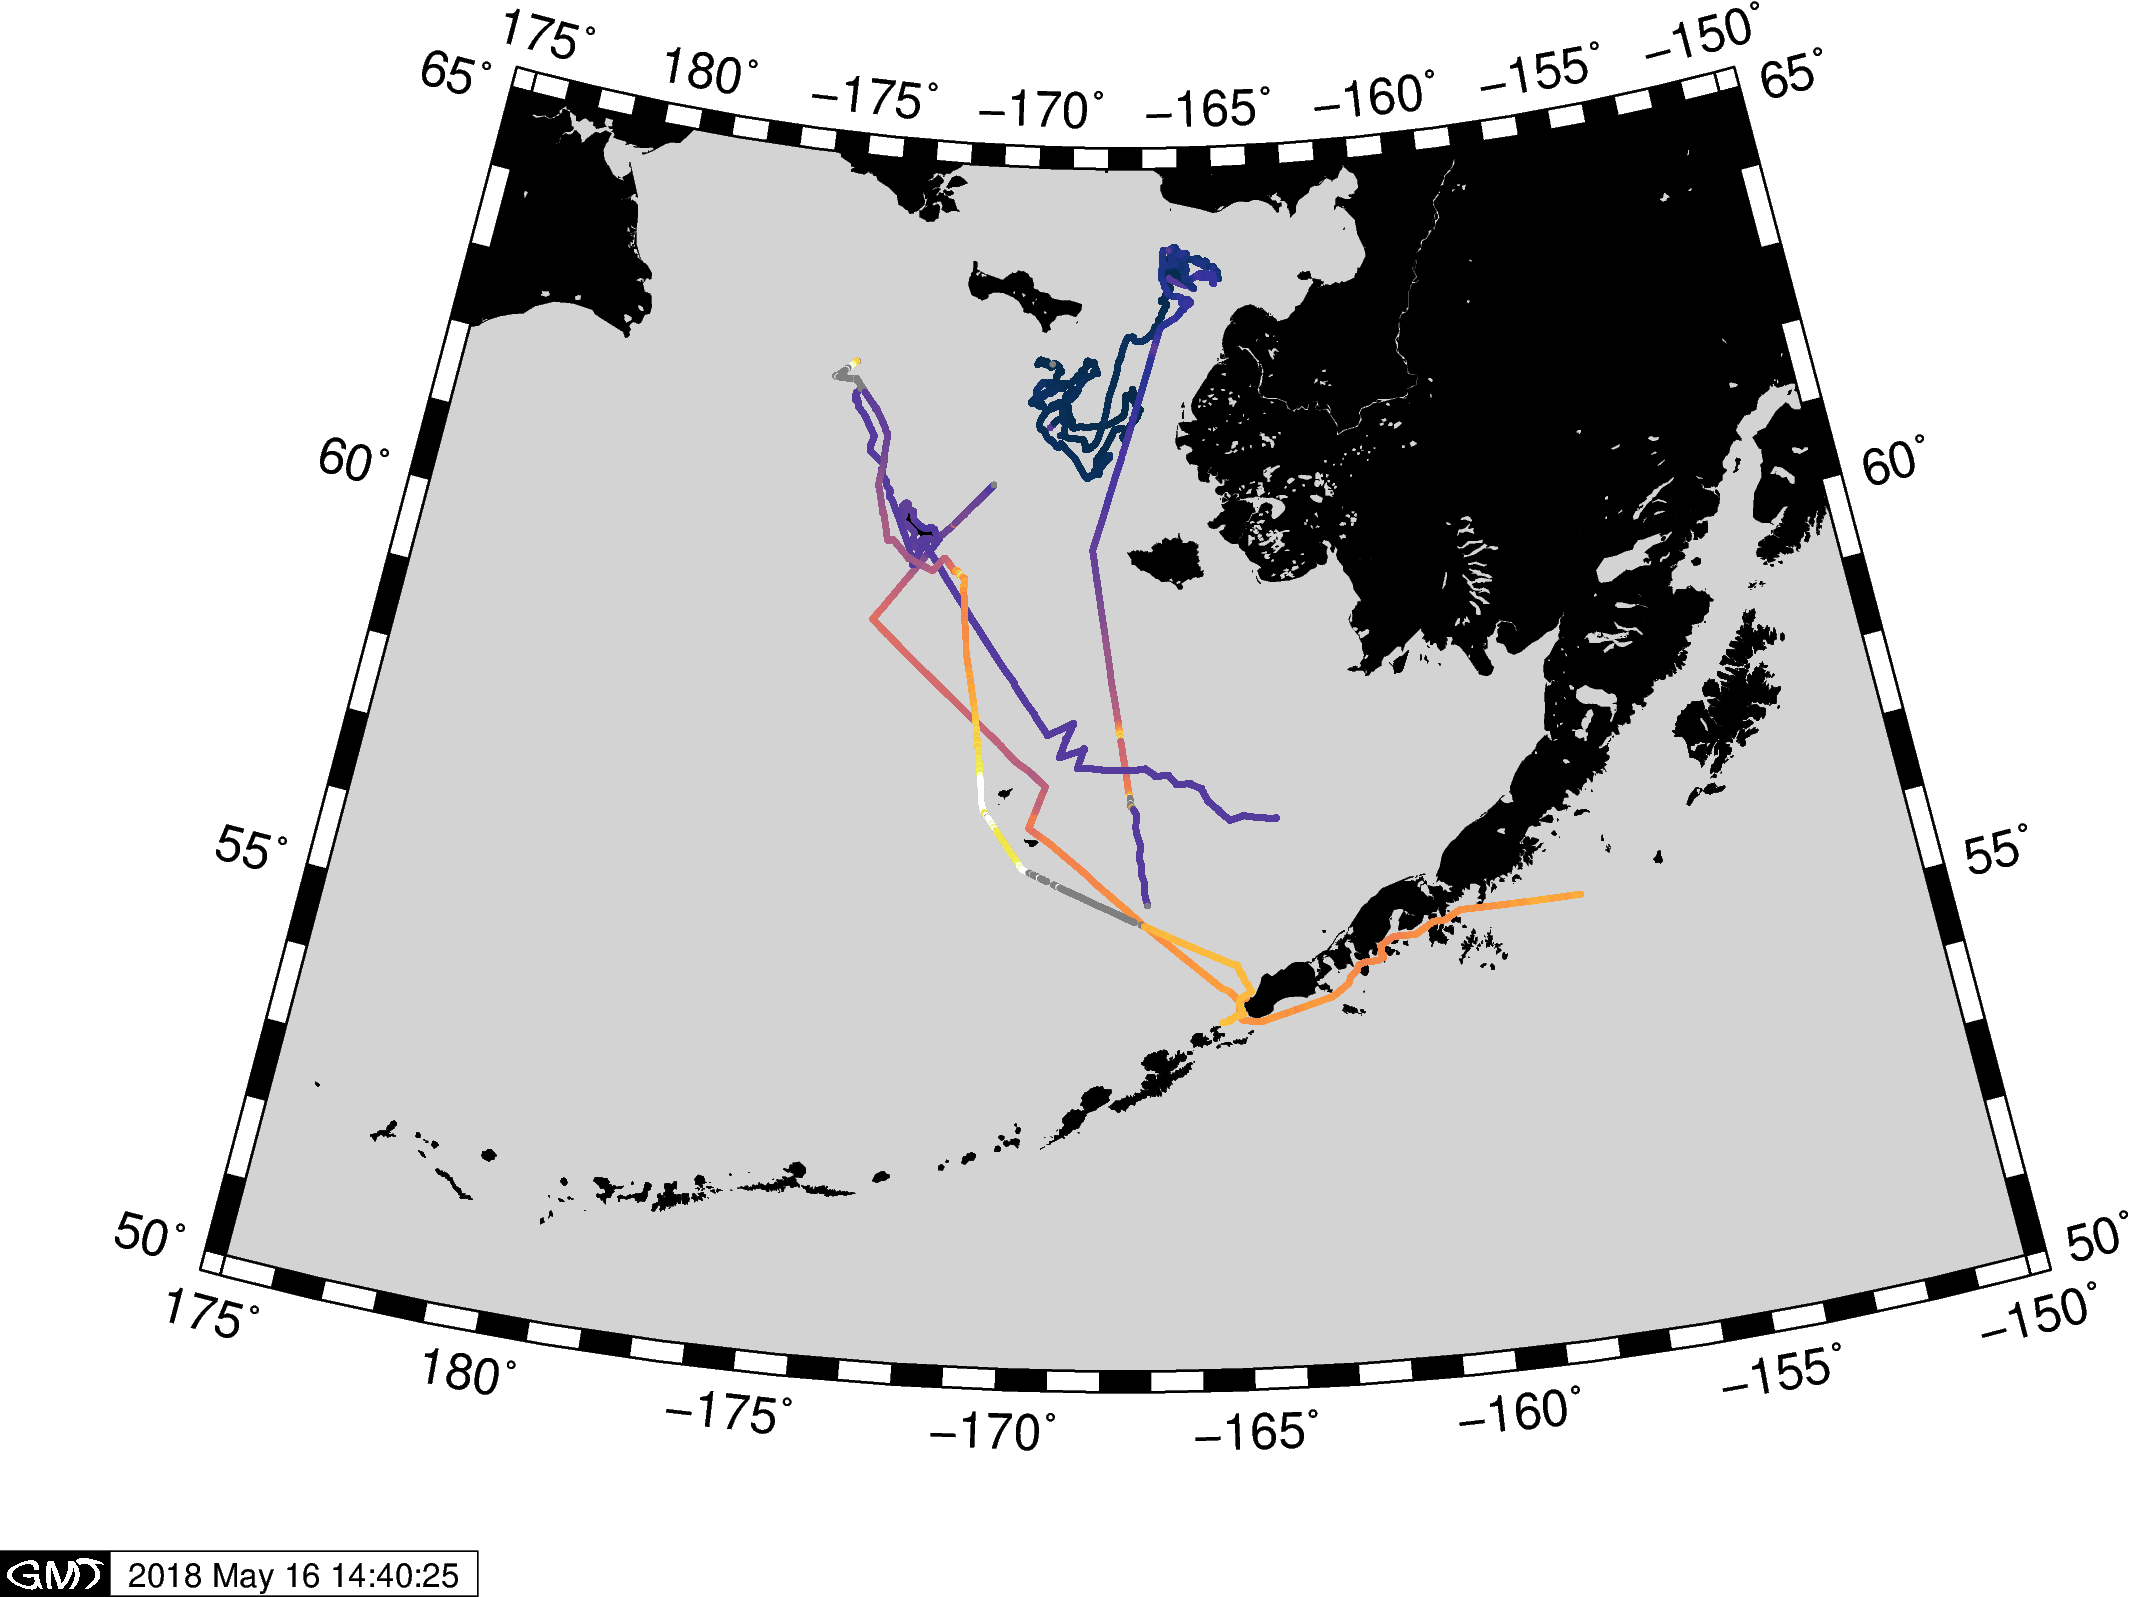

In [109]:
fig.show()